In [1]:
import numpy as np; 
import pandas as pd; 
import matplotlib.pyplot as plt;
import matplotlib.dates as mdates

# Part 1 - Data import

### Task 1: 
[5 points] Create a new dataframe

In [2]:
#Import raw data
df_mobility = pd.read_csv(r'C:\Users\s2161699\OneDrive\Documenten\python_final\2020_NL_Region_Mobility_Report.csv')
df_covid = pd.read_csv(r'C:\Users\s2161699\OneDrive\Documenten\python_final\owid-covid-data.csv')

#Verification of import
#print(df_covid.head())
#print(df_mobility.head())

In [3]:
#Filter the raw data such that only the Netherlands is included
df_mobility_nl = df_mobility[df_mobility['place_id'] == 'ChIJu-SH28MJxkcRnwq9_851obM']   #The long code belongs to the netherlands
df_covid = df_covid[df_covid['location'] == 'Netherlands']

In [4]:
#First merge the two dataframes of mobility and covid data. The merge is done by looking at the row values of the column 'date'.
df_merged = pd.merge(df_covid, df_mobility_nl, on = 'date')

#Remove duplicate dates. Only the first row of a given date is used, the remainder is deleted.
df_merged = df_merged.groupby("date").first().reset_index()

#Verification required to successfully remove dublicate dates. 
#df_merged_cleaned.to_csv(r'C:\Users\s2161699\OneDrive\Documenten\python_final\MergedVerification3.csv')

# Part 2 - Data processing


In [5]:
#Algorithm to find peaks

def find_peaks(data, activity):
   
    #First define empty list
    max_index = []
    
    #Stepwise find value that is higher than previous value, if found save this value.
    value1 = data[activity].iloc[0] #value of activity at first index
    value2 = data[activity].iloc[1] #value of activity at second index
    value3 = 0 #define variable, put value as 0
    
    #loop over all indexed values in data, value1 and value2 are already defined, these are thus exluded:
    for i in range(0, len(data[activity])):
        if i > 1:
            value3 = data[activity].iloc[i]
            if value2 > value1 and value2 > value3: #maximum if index i is larger than i-1 and than i+1
                 max_index.append(i-1) 
            value1 = value2 #reset values at new index to commence search for next loop
            value2 = value3
                
            
    return(max_index)

### Task 2: 
[8 points] Provide pseudo-code or logic behind the offset algorithms that you will develop for the following questions (3. and 4.) Use bullet points/flow chart/pseudocode/other means to explain the logic.




In [6]:
#-The programme should check all indexes in the list of peaks for their value, where each index is a peak. 
#        The peaks have as value the index at which that peak occurs.

#-For every index all other indexes should be checked. This feature ensures that the offset can be added. 
#        The only limit to the size of the offset is the time span of measurements taken.

#-The index of the peak (the date) of dataset1 is now compared to the index of the peak of dataset2. 
#        If the index of the peak of data1 is within bounds (+- offset) of the index of the peak of data2 then its a pair.

#-Found pairs should be stored so that the index (the date) should be saved.
#        Because of the offset the index of the shared peak of the two datasets will be different. The shared index of both should be shown.

In [7]:
#Algorithm to find identical peaks

def find_shared_peaks(data1, data2, offset):

    #Define empty list
    shared_index_data1 = []
    shared_index_data2 = []
    
    #Set indices to 0
    peak1 = 0
    peak2 = 0
  
    for peak1 in range(0, len(data1)):  #Go through values of data1
        boundlow = data1[peak1] - offset 
        boundup = data1[peak1] + offset
        for peak2 in range(0, len(data2)):   #Go through values of data2
            if data2[peak2] <= boundup and data2[peak2] >= boundlow:  #Check if date of peak from data1 is within margins of offset away from peak of data2
                shared_index_data1.append(data1[peak1])  #Store location of shared peak corresponding to peak of data1
                shared_index_data2.append(data2[peak2])  #Store location of shared peak corresponding to peak of data2
                
    shared_index = (shared_index_data1, shared_index_data2, len(shared_index_data1), len(shared_index_data2))
    return(shared_index) 


### Task 3:
[10 points] Find all the common peaks/valleys of mobility activity patterns of a municipality/provinces/nation within a range of time offsets.

In [8]:
#Two activities within the same country: the netherlands.

#Find peaks of first activity
activity1 = 'grocery_and_pharmacy_percent_change_from_baseline'
data1 = df_mobility_nl
max_ind1 = find_peaks(data1, activity1)

#Find peaks of second activity
activity2 = 'transit_stations_percent_change_from_baseline'
data2 = df_mobility_nl
max_ind2 = find_peaks(data2, activity2)

#Find shared peaks using an offset as defined and print result
offset = 1
shared_peaks = find_shared_peaks(max_ind1, max_ind2, offset)



print('Index of peak from change in grocery and pharmacy use: \n' + str(max_ind1) + '\n') #Print peaks of change in grocery use
print('Index of peak from change in transit use: \n' + str(max_ind2) + '\n') #Print peaks of change in use of transit stations
print('Index of shared peak as seen from change in grocery and pharmacy use: \n' + str(shared_peaks[0]) + '\n') #Print shared peaks.
print('Index of shared peak as seen from change in transit use: \n' + str(shared_peaks[1]))

Index of peak from change in grocery and pharmacy use: 
[3, 6, 10, 13, 15, 17, 20, 27, 30, 45, 48, 52, 55, 59, 62, 66, 69, 73, 75, 84, 87, 90, 95, 97, 101, 105, 108, 112, 115, 117, 122, 126, 129, 131, 136, 143, 146, 150, 157, 159, 164, 166, 171, 178, 180, 185, 187, 192, 194, 199, 202, 206, 208, 213, 220, 227, 230, 232, 234, 237, 241, 244, 248, 251, 255, 258, 262, 265, 269, 272, 279, 283, 286, 290, 293, 297, 299, 301, 303, 307, 311]

Index of peak from change in transit use: 
[7, 15, 18, 21, 35, 39, 42, 50, 53, 56, 60, 64, 71, 74, 78, 81, 84, 88, 92, 95, 98, 102, 106, 112, 116, 119, 123, 126, 130, 134, 137, 139, 141, 143, 148, 151, 154, 158, 162, 165, 169, 172, 176, 179, 183, 186, 190, 196, 200, 204, 211, 218, 224, 230, 232, 235, 237, 239, 252, 256, 259, 263, 270, 272, 277, 279, 281, 284, 286, 291, 293, 303, 309, 317, 319]

Index of shared peak as seen from change in grocery and pharmacy use: 
[6, 15, 17, 20, 52, 55, 59, 73, 75, 84, 87, 95, 97, 101, 105, 112, 115, 117, 122, 126, 129, 13

### Task 4:
[2 points] Find all the common peaks/valleys of the selected covid data of municipality/provinces/nation within a range of time offsets.

In [9]:
#Two types of data within the same country: the netherlands.

#Find peaks of first data
max_ind3 = find_peaks(df_covid, 'new_cases')

#Find peaks of second data
max_ind4 = find_peaks(df_covid, 'new_deaths')

#Find shared peaks using an offset as defined and print result
offset = 0
shared_peaks = find_shared_peaks(max_ind3, max_ind4, offset)

#Print shared peaks for verification.
print('Index of peak from change in new cases: \n' + str(max_ind3) + '\n') #Print peaks of change in grocery use
print('Index of peak from change in new deaths: \n' + str(max_ind4) + '\n') #Print peaks of change in use of transit stations
print('Index of shared peak as seen from change in new cases: \n' + str(shared_peaks[0]) + '\n') #Print shared peaks.
print('Index of shared peak as seen from change in new deaths: \n' + str(shared_peaks[1]))

Index of peak from change in new cases: 
[2, 4, 10, 13, 15, 23, 29, 35, 38, 43, 50, 56, 59, 63, 68, 70, 77, 81, 84, 88, 90, 94, 99, 101, 104, 106, 109, 115, 119, 123, 126, 129, 133, 136, 139, 144, 146, 148, 150, 154, 156, 159, 161, 165, 167, 170, 174, 179, 181, 188, 190, 192, 195, 197, 204, 211, 213, 216, 221, 226, 229, 234, 239, 242, 246, 253, 260, 268, 272, 274, 276, 284, 290, 294, 297, 301, 308, 310, 315, 322, 325, 329, 335, 344, 350, 358, 360, 365, 370, 373, 380, 387, 394, 399, 401, 406, 409, 411, 414, 416, 420, 427, 431, 435, 440, 446, 448, 451, 456, 462, 468, 474, 476, 479, 481, 483, 487, 499, 505, 510, 512, 516, 518, 525, 533, 538, 542, 545, 547, 552, 555, 559, 561, 564, 566, 568, 573, 580, 582, 589, 594, 597, 603, 605, 609]

Index of peak from change in new deaths: 
[10, 15, 17, 19, 24, 27, 29, 31, 33, 35, 37, 40, 42, 44, 48, 54, 58, 62, 64, 68, 70, 75, 78, 83, 86, 89, 91, 95, 99, 103, 106, 109, 114, 117, 124, 126, 128, 131, 135, 146, 150, 152, 157, 160, 163, 167, 171, 175, 177

### Task 5: 
[8 points] Relationship between common peaks/valleys (municipal/provincial/nationwide) in activities and covid data (municipal/provincial/nationwide) (time-offset) (either through observation or using programmable logic). If you only use visual observational methods, you won't get maximum points for this question.

In [10]:
#The execution of this task is split into the following parts:
#    Data preperation: selection of two datasets and discovery of peaks in each. 
#    Definition of smoothing function required to plot
#    Visual plot of the relationship between the two datasets and qualatative analysis
#    Quantative analysis to improve conclusion

In [11]:
#Two types of data within the same country: the netherlands.

#Find peaks of first data
max_ind5 = find_peaks(df_merged, 'reproduction_rate')


#Find peaks of first data
max_ind6 = find_peaks(df_merged, 'residential_percent_change_from_baseline')


#Find shared peaks using an offset as defined and print result
offset = 2
shared_peaks = find_shared_peaks(max_ind5, max_ind6, offset)

#Print shared peaks for verification.
print('Index of peak from change in reproduction rate: \n' + str(max_ind5) + '\n') #Print peaks of change in grocery use
print('Index of peak from change in residential use: \n' + str(max_ind6) + '\n') #Print peaks of change in use of transit stations
print('Index of shared peak as seen from change in reproduction rate: \n' + str(shared_peaks[0]) + '\n') #Print shared peaks.
print('Index of shared peak as seen from change in residential use: \n' + str(shared_peaks[1]))


Index of peak from change in reproduction rate: 
[15, 18, 23, 39, 70, 88, 94, 101, 119, 123, 127, 144, 150, 156, 159, 161, 167, 179, 241]

Index of peak from change in residential use: 
[4, 26, 28, 35, 43, 46, 49, 60, 68, 70, 77, 84, 88, 91, 95, 98, 102, 105, 110, 112, 119, 126, 133, 138, 140, 147, 158, 161, 166, 168, 175, 189, 194, 201, 203, 210, 215, 217, 222, 224, 229, 231, 236, 238, 243, 245, 252, 259, 266, 273, 277, 280, 287, 294, 302, 306]

Index of shared peak as seen from change in reproduction rate: 
[70, 70, 88, 94, 101, 119, 127, 156, 159, 159, 161, 167, 167, 241]

Index of shared peak as seen from change in residential use: 
[68, 70, 88, 95, 102, 119, 126, 158, 158, 161, 161, 166, 168, 243]


In [12]:
#Function required to smooth data which improves graph visibility. 
def smooth(data, box_pts):
    box = np.ones(box_pts)/box_pts
    data_smooth = np.convolve(data, box, mode = 'same')
    return data_smooth

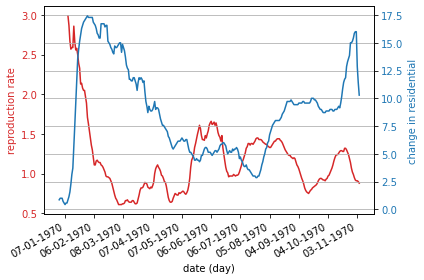

In [13]:
#Prepare data for plotting
date = df_merged['date']
data1 = df_merged['reproduction_rate']

#Smoothing the data over 7 days using earlier defined smoothing function.
data2 = smooth(df_merged['residential_percent_change_from_baseline'], 7)

#Define plot
fig, ax1 = plt.subplots()

#Import the first dataset into the plot
color = 'tab:red'
ax1.set_xlabel('date (day)')
ax1.set_ylabel('reproduction rate', color=color)
ax1.plot(date, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#Import the second dataset into the plot. X label is already defined in the part earlier.
color = 'tab:blue'
ax2.set_ylabel('change in residential', color=color) 
ax2.plot(date, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Add interval to the plotting of dates. If every date was plotted this would be illegible. 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# I know the dates start at 1970, did not know how to fix this. 

In [14]:
#Prepare the data
date = df_merged['date']
Rrate = df_merged['reproduction_rate']

#Filter the reproduction fates by bserving the critical value at 1.
Rrate_above = df_merged.loc[df_merged['reproduction_rate'] >= 1, 'reproduction_rate']
Rrate_below = df_merged.loc[df_merged['reproduction_rate'] < 1, 'reproduction_rate']

#Filter the change in residential by observing the critical value of the reproduction rate.
Home_above = df_merged.loc[df_merged['reproduction_rate'] >= 1, 'residential_percent_change_from_baseline']
Home_below = df_merged.loc[df_merged['reproduction_rate'] < 1, 'residential_percent_change_from_baseline']

#Print of results
print('When there was an increase in residential, the R value decreased. Lockdowns have had a positve effect on the spread')
print('\n')
print('Average change in residential with R above 1: ' + str(sum(Home_above)/len(Home_above)) + '%')
print('Average change in residential with R below 1: ' + str(sum(Home_below)/len(Home_below)) + '%')

When there was an increase in residential, the R value decreased. Lockdowns have had a positve effect on the spread


Average change in residential with R above 1: 8.453488372093023%
Average change in residential with R below 1: 9.90625%


### Task 6: 
[12 points] Use visualization to tell the mobility and covid data story of a specific municipality/province/nationwide. This is a more exploration question. Explain the logic behind your story and also your visualization choices

This story is of the Netherlands 

During the corona year there were little changes. Transit and work remained low. Use of parks saw a great increase during the summer months.


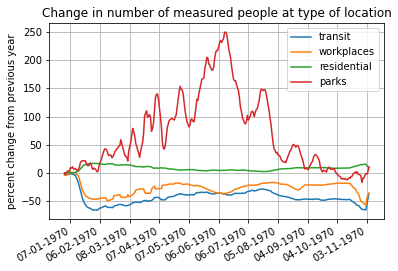

Even though the peak of intensive care patients is as high at the beginning of the time period as at the end. New cases were much lower. This is due to the lower testing rate.


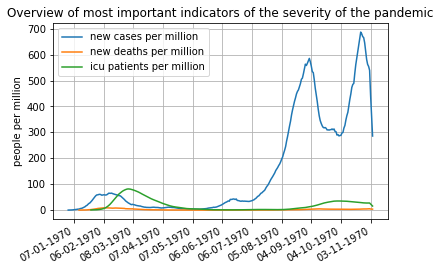

The stringency index shows the severity of safety measures taken by the government. It is clear that the initial lockdowns were the hardest and longest, and set the tone for the remainder of the year. 


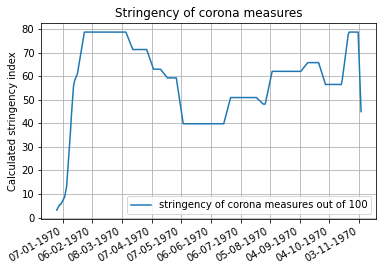

In [15]:
print('This story is of the Netherlands \n')
print('During the corona year there were little changes. Transit and work remained low. Use of parks saw a great increase during the summer months.')
#Prepare data
days = df_merged['date']

#Add interval for the plotting of x axis to reduce clutter when plotting dates.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))

#insert data into plots, raw data has been smoothened over a week (7 days)
plt.plot(days, smooth(df_merged['transit_stations_percent_change_from_baseline'], 7))
plt.plot(days, smooth(df_merged['workplaces_percent_change_from_baseline'], 7))
plt.plot(days, smooth(df_merged['residential_percent_change_from_baseline'], 7))
plt.plot(days, smooth(df_merged['parks_percent_change_from_baseline'], 7))
plt.title('Change in number of measured people at type of location')
plt.ylabel('percent change from previous year')
#legend
labels = ['transit', 'workplaces', 'residential', 'parks']
plt.legend(labels)

#aligning and show
plt.grid()
plt.gcf().autofmt_xdate()
plt.show()


# I know the dates start at 1970, did not know how to fix this. 


####################################################################################

print('Even though the peak of intensive care patients is as high at the beginning of the time period as at the end. New cases were much lower. This is due to the lower testing rate.')

#Add interval for the plotting of x axis to reduce clutter when plotting dates.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))

#insert data into plots, raw data has been smoothened over a week (7 days)
plt.plot(days, smooth(df_merged['new_cases_per_million'], 7))
plt.plot(days, smooth(df_merged['new_deaths_per_million'], 7))
plt.plot(days, smooth(df_merged['icu_patients_per_million'], 7))
plt.title('Overview of most important indicators of the severity of the pandemic')
plt.ylabel('people per million')

#legend
labels = ['new cases per million', 'new deaths per million', 'icu patients per million']
plt.legend(labels)

#aligning and show
plt.grid()
plt.gcf().autofmt_xdate()
plt.show()

####################################################################################

print('The stringency index shows the severity of safety measures taken by the government. It is clear that the initial lockdowns were the hardest and longest, and set the tone for the remainder of the year. ')

#Add interval for the plotting of x axis to reduce clutter when plotting dates.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))

#insert data into plots, raw data has been smoothened over a week (7 days)
plt.plot(days, smooth(df_merged['stringency_index'], 7))
plt.title('Stringency of corona measures')


#legend
labels = ['stringency of corona measures out of 100']
plt.ylabel('Calculated stringency index')
plt.legend(labels)

#aligning and show
plt.grid()
plt.gcf().autofmt_xdate()
plt.show()